4　特殊要素と労働移動

　「第4回特殊要素と所得分配」では、主要先進7カ国（G7）の国際貿易統計と労働市場の関係について、データの可視化と統計分析を行います。本例では、ライブラリwbgapiを用いて世界銀行データを取得し、分析します。

まず、パッケージをインストールします。

In [ ]:
pip install wbgapi

  　続いて、マクロ経済データの取得と分析に必要なライブラリをインポートします。今回使用するのはwbgapi、pandas_datareader、pandas、matplotlibの4種類です。

In [41]:
#[1]ライブラリの読み込み
import wbgapi as wb #世界銀行データ取得のためのライブラリ
import pandas_datareader as data #データ取得ライブラリ
import pandas as pd #データセット管理のためのライブラリ
import matplotlib.pyplot as plt #図表作成のためのライブラリ

　世界銀行データからマクロ経済統計を取得するためには、必要なデータのコードと国・地域コードが必要になります。まず、データコードの検索方法は次の通りです。例えば、失業率(Unemployment Rate)を検索する場合、部分一致する何かしらの単語を入力すれば関連候補が検索されます。

In [ ]:
#[3]データコードの検索
display(wb.series.info(q='unemployment'))

　次に失業率の取得手順を示します。本例では米国の失業率の取得と可視化、記述統計の算出例を示しますが、1行目を変更することで、G7いずれの国のデータの取得が可能です。

In [ ]:
#[4]失業率データの取得
countries = ["USA"]
indicators = {'SL.UEM.TOTL.NE.ZS':'Unemployment Japan'}
unemployment=wb.data.DataFrame(indicators,countries, time=range(1970, 2023), skipBlanks=True, columns='series')
country_list=['unemployment']
unemployment.columns = country_list
unemployment.describe()

　続いて、米国の輸入額（対GDP比）のデータを取得し、記述統計を算出します。

In [ ]:
#[5]輸入（対GDP比）データの取得
countries = ["USA"]
indicators = {'NE.IMP.GNFS.ZS':'Imports of Goods and Services Japan'}
import_gdp=wb.data.DataFrame(indicators,countries, time=range(1970, 2023), skipBlanks=True, columns='series')
country_list=['Import_per_GDP']
import_gdp.columns = country_list
import_gdp.describe()

　最後に、上記の2つのデータフレームを統合し、可視化した後に相関係数を算出します。国際労働移動により、国際貿易の活発化により、労働人口が海外へ流出／流入していれば、両変数の相関は正となるはずです。

<Axes: xlabel='time'>

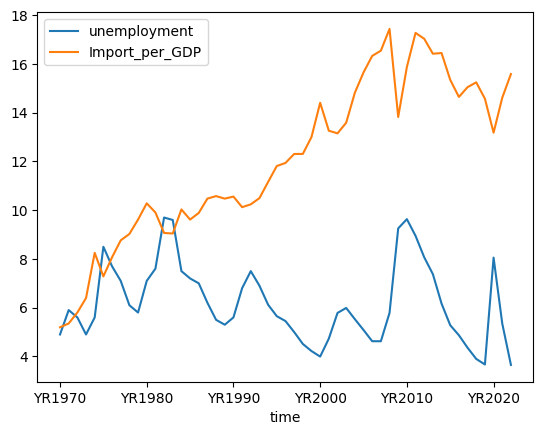

In [46]:
#[6]データ統合と可視化・相関マトリクス
country=unemployment.merge(import_gdp,on='time',how='inner')
country.head()
country.corr()
country.plot()

　ちなみに、2変数の相関係数は、下記のCodeにより個別に算出することもできる。

In [ ]:
#[7]相関係数の算出
country['unemployment'].corr(country['Import_per_GDP'])